In [6]:
install.packages("ggpubr")

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘matrixStats’, ‘caret’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’




In [7]:
library(ggplot2)
library(gridExtra)
library(ggpubr)

In [8]:
figure_folder="Figures"
dir.create(figure_folder)

Warning message in dir.create(figure_folder):
“'Figures' already exists”


Cell States Probabilities Plot

In [9]:
prob_folder="CellState_Probability_CSVs"
full_network_att_probs=read.table(paste(prob_folder,"/full_network_att_probs.csv", sep=""), sep=",")
sampled_network_att_probs=read.table(paste(prob_folder,"/sampled_network_att_probs.csv", sep=""), sep=",")


In [10]:
full_probs=unlist(full_network_att_probs)

In [11]:
sampled_probs=unlist(sampled_network_att_probs)

In [12]:

p1=qplot(full_probs, geom="histogram",  breaks=seq(0,1,0.05),  
      xlab="Cell States' SSPs in the PBNs \n(Full Network Approach)", 
      ylab= "Counts of Cell States (Total=200)",
      fill=I("dodgerblue2") ) +theme_bw()+theme(text = element_text(size = 10))+  ylim(0, 120)
            

p2=qplot(sampled_probs, geom="histogram",  breaks=seq(0,1,0.05),  
      xlab="Cell States' SSPs in the PBNs \n (Sampled Network Approach)", 
      ylab= "Counts of Cell States (Total=200)",
      fill=I("dodgerblue2") ) +theme_bw() +theme(text = element_text(size = 10)) +   ylim(0, 120)            

#plot=grid.arrange(p1, p2, nrow = 1,  labels=c("A", "B"))
plot=ggarrange(p1, p2, nrow = 1, labels = c("a", "b"))


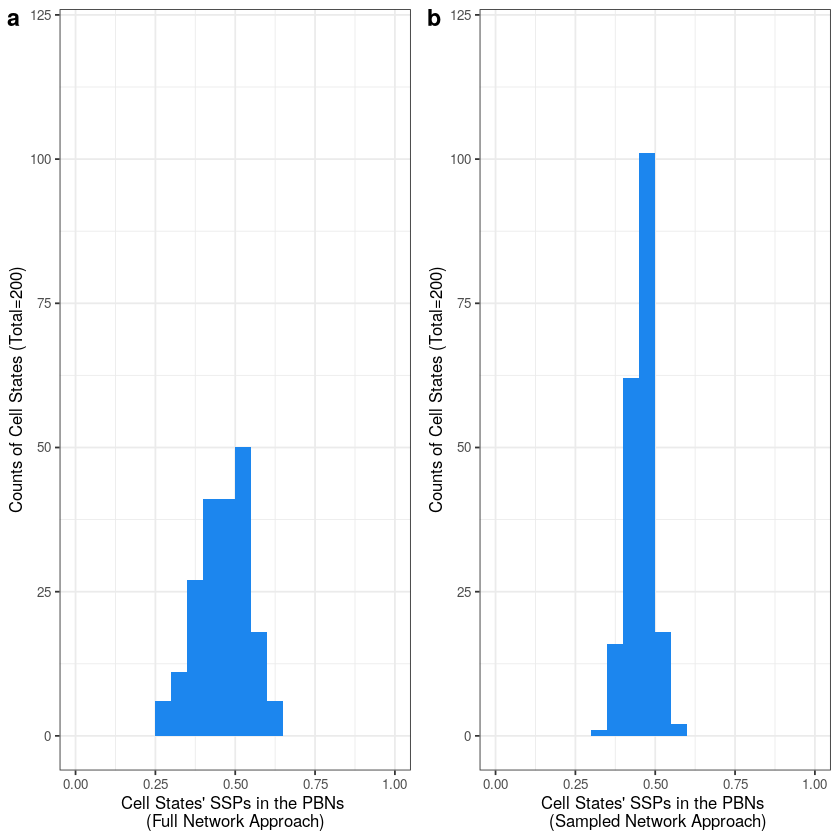

In [13]:
plot

In [14]:
ggsave(plot, file=paste(figure_folder, "/cell_states.pdf", sep=""), width = 7, height = 4, units ="in",  dpi = 300)
ggsave(plot, file=paste(figure_folder, "/cell_states.png", sep=""), width = 7, height = 4, units ="in",  dpi = 300)

Probability Shift Plots 

In [272]:
prob_shift_folder="Probability_Shift_CSVs"
neg_pos_1_full=read.table(paste(prob_shift_folder, "/neg_pos_1_full.csv", sep=""), sep=",")
neg_pos_1_sampled=read.table(paste(prob_shift_folder, "/neg_pos_1_sampled.csv", sep=""), sep=",")
pos_neg_0_full=read.table(paste(prob_shift_folder, "/pos_neg_0_full.csv", sep=""), sep=",")
pos_neg_0_sampled=read.table(paste(prob_shift_folder, "/pos_neg_0_sampled.csv", sep=""), sep=",")

In [287]:
length(unlist(neg_pos_1_full))

[1] 252

In [288]:
length(unlist(pos_neg_0_sampled))

[1] 266

In [289]:
all_shift=rbind(data.frame(Group="U0_D1_I1" ,PS=unlist(neg_pos_1_full), Network="Full Network"),
data.frame(Group="U0_D1_I1" ,PS=unlist(neg_pos_1_sampled), Network="Sampled Network"),
data.frame(Group="U1_D0_I0" ,PS=unlist(pos_neg_0_full), Network="Full Network"),
data.frame(Group="U1_D0_I0" ,PS=unlist(pos_neg_0_sampled), Network="Sampled Network"))


In [292]:
ps_plot=ggplot(all_shift, aes(x = Group, y = PS, fill = Network)) +    # Create boxplot chart in ggplot2
 geom_boxplot()+theme_bw() +#theme(text = element_text(size = 10))+
xlab("Groups")+ylab("Probability Mass Shift (PS)") +
labs(fill='Network Type') + 
theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=1))

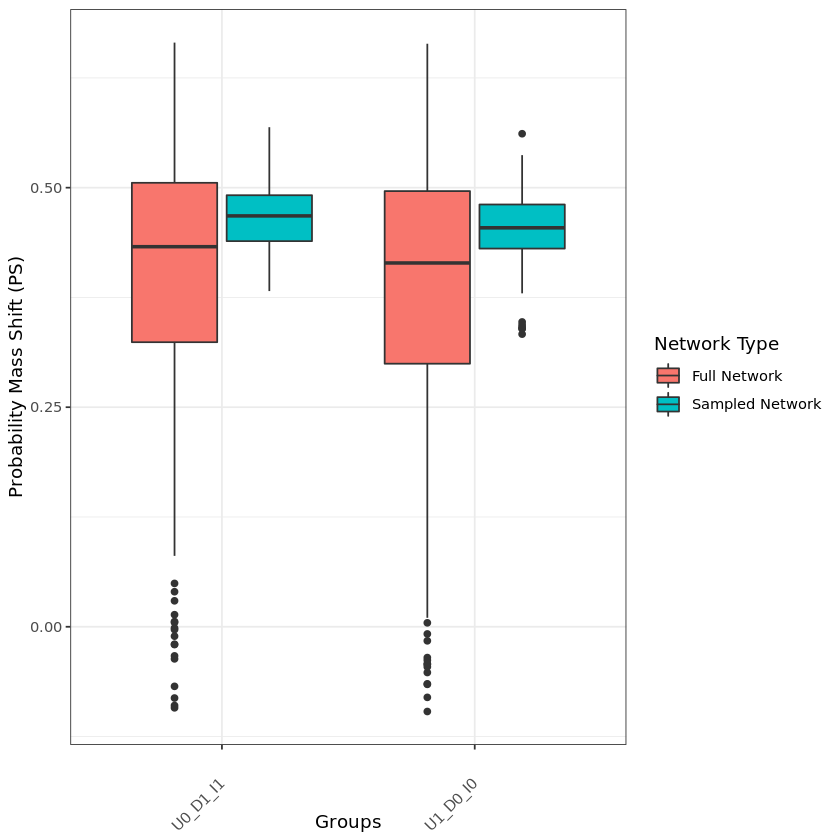

In [293]:
ps_plot

In [294]:
ggsave(ps_plot, file=paste(figure_folder, "/prob_shift.pdf", sep=""), width = 7, height = 4, units ="in",  dpi = 300)
ggsave(ps_plot, file=paste(figure_folder, "/prob_shift.png", sep=""), width = 7, height = 4, units ="in",  dpi = 300)

correlation plots

In [297]:
correlation_folder="Correlation_CSVs"
all_correlations=read.table(paste(correlation_folder, "/all_correlation.csv", sep=""), sep=",")
att_grouped_correlations=read.table(paste(correlation_folder, "/attractor_grouped_correlation.csv", sep=""), sep=",")


In [298]:
correlation_data=rbind(data.frame(Type="Intervention" ,Correlation=unlist(all_correlations)),
data.frame(Type="CellStatePair", Correlation=unlist(att_grouped_correlations)))


In [299]:
length(unlist(all_correlations))

[1] 518

In [300]:
length(unlist(att_grouped_correlations))

[1] 100

In [301]:
correlation=rbind(data.frame(Group="Per Intervention", Correlation=unlist(all_correlations)),
data.frame(Group="Per Cell State Pair" , Correlation=unlist(att_grouped_correlations)))


In [318]:
correlation_plot=ggplot(correlation, aes(x = Group, y = Correlation)) +    # Create boxplot chart in ggplot2
geom_boxplot()+theme_bw() + #+ theme(text = element_text(size = 10))+
#theme(axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=1))+
xlab("")


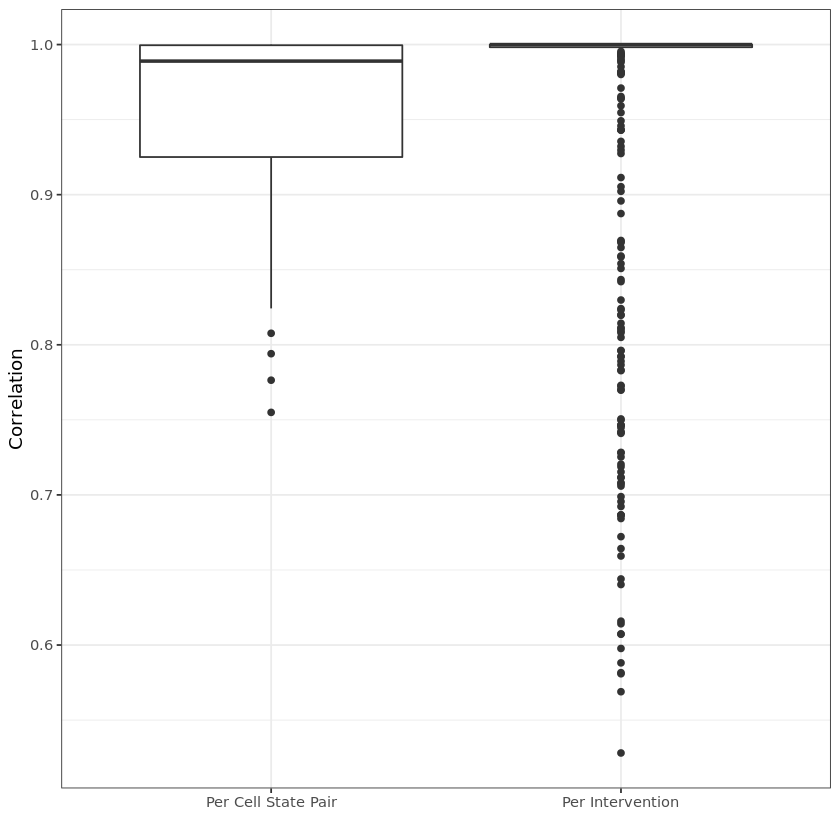

In [319]:
correlation_plot

In [320]:
ggsave(correlation_plot, file=paste(figure_folder, "/correlation.pdf", sep=""), width = 7, height = 4, units ="in",  dpi = 300)
ggsave(correlation_plot, file=paste(figure_folder, "/correlation.png", sep=""), width = 7, height = 4, units ="in",  dpi = 300)